<font color=#733483>IMPORTING</font>

In [174]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import random 
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [29]:
drugs = pd.read_csv("C:/Users/e u n o i a/Downloads/drug200.csv")

<font color=#733483>DATA ANALYSIS</font>

In [30]:
drugs.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [31]:
columns = drugs.columns
#BP - blood pressure
#Na to Potassium Ratio 

In [32]:
drugs.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [33]:
drugs.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


<font color=#733483>DATA VISUALISATION</font>

<AxesSubplot:xlabel='Drug', ylabel='count'>

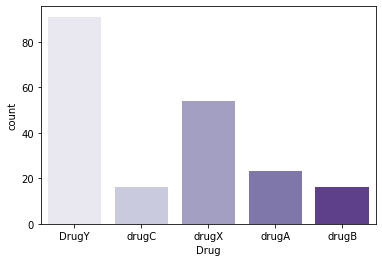

In [34]:
sns.countplot(x = "Drug", data = drugs, palette="Purples")

<AxesSubplot:title={'center':'drug by potassium'}, xlabel='Na_to_K', ylabel='Drug'>

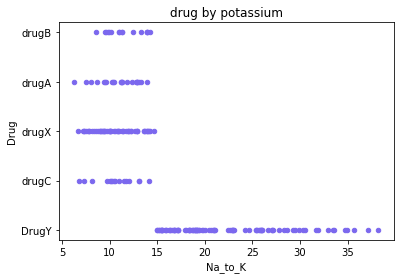

In [35]:
drugs.plot( title = "drug by potassium", kind= "scatter", x = "Na_to_K", y = "Drug", color = "mediumslateblue")

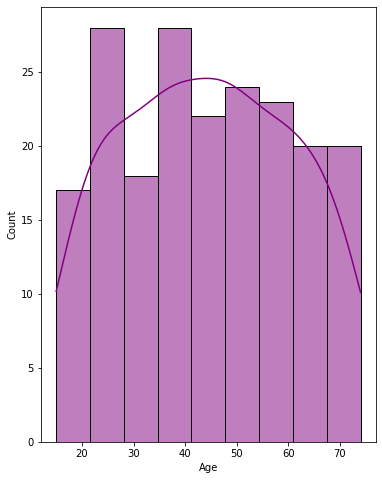

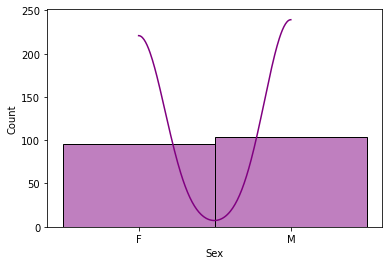

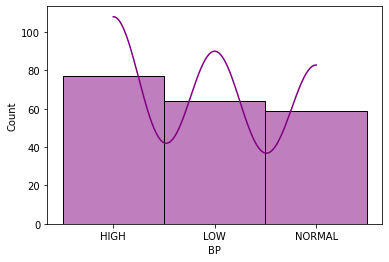

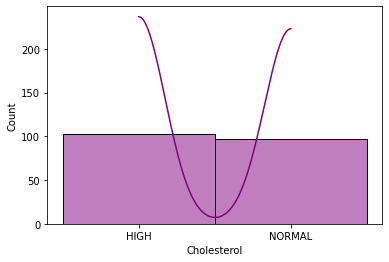

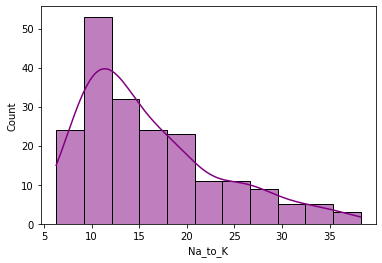

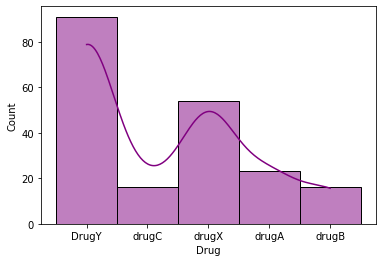

In [36]:
plt.figure(figsize=(6,8))
for i in drugs.columns:
    sns.histplot(drugs[i],kde = True, color = "purple" )
    plt.show()

c:\Users\e u n o i a\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Na_to_K', ylabel='Age'>

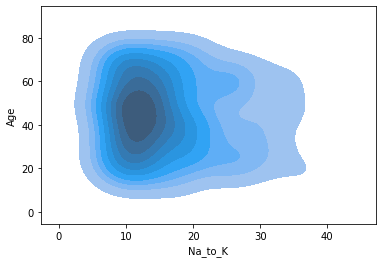

In [37]:
x = drugs["Na_to_K"]
y = drugs["Age"]

sns.kdeplot(x, y, palette="BuPu", shade=True)

In [115]:
drugs.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

<font color=#733483>MODEL TRAINING</font>

In [116]:
g=pd.get_dummies(data=drugs,columns=["Sex","BP", "Cholesterol"])

In [117]:
g.columns

Index(['Age', 'Na_to_K', 'Drug', 'Sex_F', 'Sex_M', 'BP_HIGH', 'BP_LOW',
       'BP_NORMAL', 'Cholesterol_HIGH', 'Cholesterol_NORMAL'],
      dtype='object')

In [148]:
g = g[["Age", "Na_to_K", 'Sex_M', 'BP_LOW', 'BP_NORMAL',
       'Cholesterol_NORMAL', "Drug"]]

In [159]:
y = g["Drug"]

In [168]:
lab = LabelEncoder()
lab.fit(y)

LabelEncoder()

In [175]:
scaler = StandardScaler()
scaler.fit(g.drop("Drug", axis =1))
scaled_features = scaler.transform(g.drop("Drug", axis=1))

In [169]:
g = pd.DataFrame(g,columns = g.columns)
g.head()

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL,Drug
0,23,25.355,0,0,0,0,DrugY
1,47,13.093,1,1,0,0,drugC
2,47,10.114,1,1,0,0,drugC
3,28,7.798,0,0,1,0,drugX
4,61,18.043,0,1,0,0,DrugY


In [193]:
array = g.values
random.shuffle(array)
random.shuffle(array)
random.shuffle(array)
X = array[:,0:6]
Y = array[:,6]
#Y=Y.astype('int')
#X=X.astype('int')
validation_size = 0.1
seed = 101
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)

In [194]:
#mod=DecisionTreeClassifier(random_state=1) 
#mod = SVC(kernel='linear') 
#mod = GaussianNB() 
#mod = LogisticRegression()
mod = KNeighborsClassifier()
#mod = LinearDiscriminantAnalysis() 
mod.fit(X_train,Y_train)
pred = mod.predict(X_test)
pred

array(['drugA', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'drugX', 'drugX', 'DrugY', 'drugC', 'drugC', 'drugC',
       'drugC', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'DrugY'], dtype=object)

<font color=#733483>REPORT</font>

In [195]:
print(confusion_matrix(Y_test,pred))

[[10  0  0  0]
 [ 0  1  0  0]
 [ 0  0  4  0]
 [ 0  0  0  5]]


In [196]:
report = classification_report(Y_test,pred)
print(report)

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        10
       drugA       1.00      1.00      1.00         1
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [198]:
preds = pd.DataFrame({'y_pred': pred, 'y_test':Y_test})
preds = preds.sort_values(by='y_test')
preds = preds.reset_index()

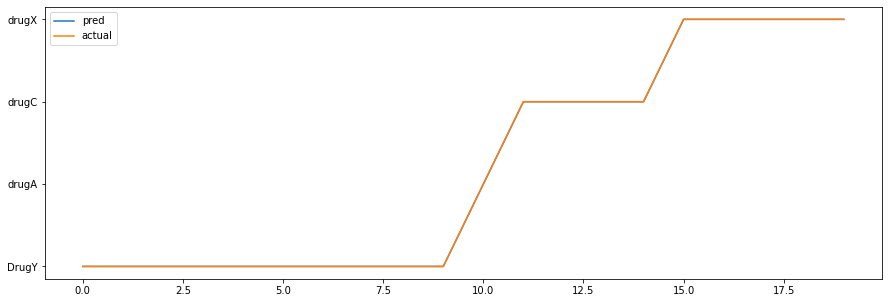

In [199]:
plt.figure(figsize=(15, 5))
plt.plot(preds['y_pred'], label='pred')
plt.plot(preds['y_test'], label='actual')
plt.legend()
plt.show()